### 1. Precision@K, Recall@K
given 5 relevant documents
- recommendation system A provides: FTTTTTFFFF
- recommendation system B provides: TTTFFFFFTT
- to compare the two, manually create a visualization, such as precision@k and recall@k

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = ['F', 'T', 'T', 'T', 'T', 'T', 'F', 'F', 'F', 'F']
B = ['T', 'T', 'T', 'F', 'F', 'F', 'F', 'F', 'T', 'T']

In [3]:
def calculate_precision_recall(results):
    precision = []
    recall = []
    total_relevant = results.count('T')
    relevant_found = 0

    for k in range(1, len(results) + 1):
        relevant_found += results[k - 1] == 'T'
        precision_at_k = relevant_found / k
        recall_at_k = relevant_found / total_relevant
        precision.append(precision_at_k)
        recall.append(recall_at_k)

    return precision, recall

In [4]:
precision_A, recall_A = calculate_precision_recall(A)
precision_B, recall_B = calculate_precision_recall(B)

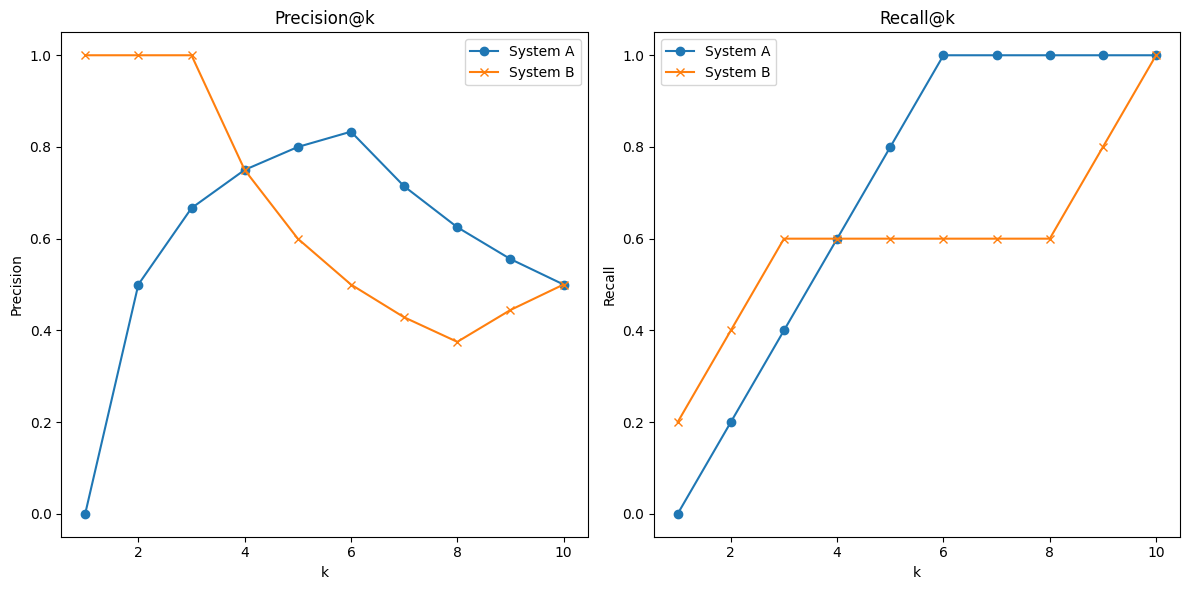

In [5]:
k_values = np.arange(1, 11)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, precision_A, label='System A', marker='o')
plt.plot(k_values, precision_B, label='System B', marker='x')
plt.title('Precision@k')
plt.xlabel('k')
plt.ylabel('Precision')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(k_values, recall_A, label='System A', marker='o')
plt.plot(k_values, recall_B, label='System B', marker='x')
plt.title('Recall@k')
plt.xlabel('k')
plt.ylabel('Recall')
plt.legend()

plt.tight_layout()
plt.show()

#### 2. Average Precision
Given 5 relevant documents
- recommendation system A provides: FTTTTTFFFF
- recommendation system B provides: TTTFFFFFTT
- provide the python code snippet for comparing AP values between the two system

In [6]:
def calculate_average_precision(results):
    relevant_count = 0
    precision_sum = 0

    for i, is_relevant in enumerate(results):
        if is_relevant == 'T':
            relevant_count += 1
            precision_at_i = relevant_count / (i + 1)
            precision_sum += precision_at_i

    average_precision = precision_sum / relevant_count if relevant_count > 0 else 0
    return average_precision

In [7]:
A = ['F', 'T', 'T', 'T', 'T', 'T', 'F', 'F', 'F', 'F']
B = ['T', 'T', 'T', 'F', 'F', 'F', 'F', 'F', 'T', 'T']

In [8]:
ap_A = calculate_average_precision(A)
ap_B = calculate_average_precision(B)

print("Average Precision for System A:", ap_A)
print("Average Precision for System B:", ap_B)

Average Precision for System A: 0.7100000000000001
Average Precision for System B: 0.788888888888889


#### 3. NDCG
Given an automated system used to rank reported bugs, where the most critical bugs should be addressed first.
- supose that there are 5 bugs, which have all been deemed critical.
- bug ranking system A outputs the following order: Minor, Critical, Critical, Critical, Critical, Critical, Minor, Critical, Minor, Minor, Minor
- bug ranking system B outputs the following order: Critical, Critical, Critical, Minor, Minor, Minor, Minor, Critical, Critical, Minor
- Relevance scores are defined as: Critical = 3, Major = 2, Minor = 1
- Using python calculate the NDCG@5 for both ranking systems A and B.

In [9]:
def calculate_dcg(scores, k):
    dcg = 0
    for i in range(k):
        dcg += scores[i] / np.log2(i + 2)  # +2 as we start counting from 1
    return dcg

def calculate_ndcg(actual_scores, ideal_scores, k):
    dcg = calculate_dcg(actual_scores, k)
    idcg = calculate_dcg(ideal_scores, k)
    ndcg = dcg / idcg if idcg > 0 else 0
    return ndcg

In [10]:
relevance_scores = {'Critical': 3, 'Major': 2, 'Minor': 1}
A = ['Minor', 'Critical', 'Critical', 'Critical', 'Critical', 'Critical', 'Minor', 'Critical', 'Minor', 'Minor', 'Minor']
B = ['Critical', 'Critical', 'Critical', 'Minor', 'Minor', 'Minor', 'Minor', 'Critical', 'Critical', 'Minor']

In [11]:
scores_A = [relevance_scores[bug] for bug in A]
scores_B = [relevance_scores[bug] for bug in B]
ideal_order = [3, 3, 3, 3, 3]

In [12]:
ndcg_A = calculate_ndcg(scores_A, ideal_order, 5)
ndcg_B = calculate_ndcg(scores_B, ideal_order, 5)

print("NDCG for System A:", ndcg_A)
print("NDCG for System B:", ndcg_B)

NDCG for System A: 0.7738931964842558
NDCG for System B: 0.8151510484299677
